# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd                       
import matplotlib.pyplot as plt             
%matplotlib inline     

##  Load the Data

In [130]:
file_location = r'C:\Users\cubil\iCloudDrive\Documents\DATA ANALISYS FOLDER\Project\retail data with Python\CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail\Online Retail.xlsx'
df = pd.read_excel(file_location)

In [131]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [132]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


## Perform data cleaning

**Duplicated rows**

In [133]:
df.shape

(541909, 8)

In [134]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (5268, 8)


In [135]:
df = df.drop_duplicates()
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [136]:
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

**Missing Values**

In [137]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [138]:
df['CustomerID']=df['CustomerID'].fillna("Unknown")

In [139]:
def get_most_frequent_description(df):
    def most_frequent(x):
        mode_values = x.mode()
        return mode_values.iloc[0] if not mode_values.empty else None

    return df.groupby('StockCode')['Description'].agg(most_frequent).reset_index(name='Description Product')

description_product_df = get_most_frequent_description(df)

df = df.merge(description_product_df, on='StockCode', how='left')

df.drop(columns=['Description'], axis=1, inplace=True)

print(df)

       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
0         536365    85123A         6 2010-12-01 08:26:00       2.55   
1         536365     71053         6 2010-12-01 08:26:00       3.39   
2         536365    84406B         8 2010-12-01 08:26:00       2.75   
3         536365    84029G         6 2010-12-01 08:26:00       3.39   
4         536365    84029E         6 2010-12-01 08:26:00       3.39   
...          ...       ...       ...                 ...        ...   
536636    581587     22613        12 2011-12-09 12:50:00       0.85   
536637    581587     22899         6 2011-12-09 12:50:00       2.10   
536638    581587     23254         4 2011-12-09 12:50:00       4.15   
536639    581587     23255         4 2011-12-09 12:50:00       4.15   
536640    581587     22138         3 2011-12-09 12:50:00       4.95   

       CustomerID         Country                  Description Product  
0         17850.0  United Kingdom   WHITE HANGING HEART T-LIGHT HOLDER  
1

In [140]:
df['Description Product']=df['Description Product'].fillna('Unknown')

In [141]:
df.count()

InvoiceNo              536641
StockCode              536641
Quantity               536641
InvoiceDate            536641
UnitPrice              536641
CustomerID             536641
Country                536641
Description Product    536641
dtype: int64

**Rename Columns**

In [142]:
df = df.rename(columns={"InvoiceNo": "Invoice", "InvoiceDate": "Date", "UnitPrice": "Price"})
df.head(5)

,Invoice,StockCode,Quantity,Date,Price,CustomerID,Country,Description Product
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


**Detecting Outliers**

<Axes: xlabel='Price'>

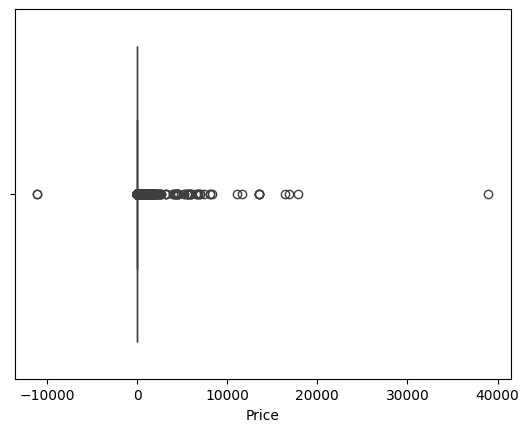

In [143]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Quantity'>

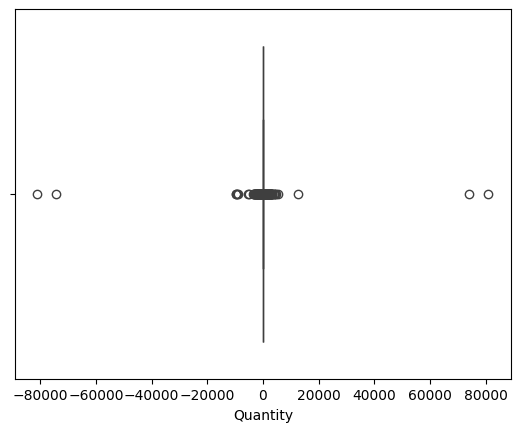

In [144]:
sns.boxplot(x=df['Quantity'])

In [145]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def remove_outliers(df, column):
    lower_bound, upper_bound = detect_outliers_iqr(df, column)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, "Quantity")
df = remove_outliers(df, "Price")


<Axes: xlabel='Price'>

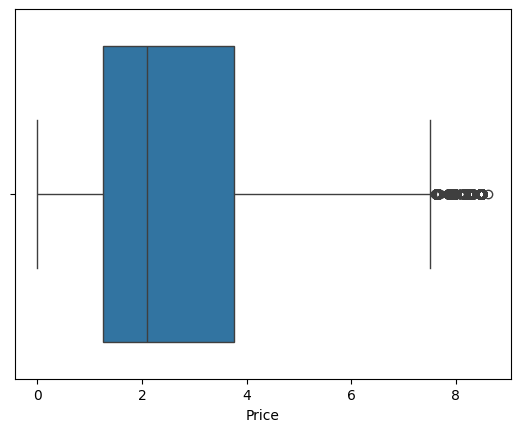

In [146]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Quantity'>

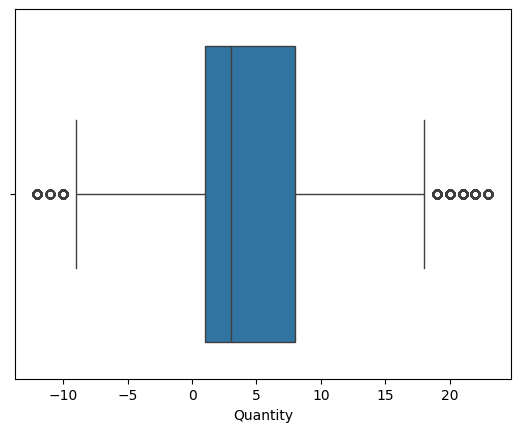

In [147]:
sns.boxplot(x=df['Quantity'])

In [148]:
df.head()

,Invoice,StockCode,Quantity,Date,Price,CustomerID,Country,Description Product
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


## Basic Statistics of the Dataset

In [149]:
df.describe()

,Quantity,Date,Price
count,445792.000000,445792,445792.000000
mean,4.798251,2011-07-04 20:34:22.011969792,2.787131
min,-12.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2011-03-27 14:28:00,1.250000
50%,3.000000,2011-07-20 11:38:00,2.100000
75%,8.000000,2011-10-19 16:59:00,3.750000
max,23.000000,2011-12-09 12:50:00,8.620000
std,4.611238,NaN,2.042970


**Mode**

In [150]:
mode = df.mode(numeric_only=True)
mode

,Quantity,Price
0,1,1.25


**Range**

In [151]:
range_min_price = np.min(df[['Price']])
range_max_price = np.max(df[['Price']])
range_min_quantity = np.min(df[['Quantity']])
range_max_quantity = np.max(df[['Quantity']])

print(f"The range  of the Price is {range_max_price-range_min_price}")
print(f"The range  of the Quantity is {range_max_quantity-range_min_quantity}")


The range  of the Price is 8.62
The range  of the Quantity is 35


## Data Visualization

**The busiest months in terms of sales**

In [152]:
df['MonthYear'] = df['Date'].dt.to_period('M').copy()
df = df.assign(TotalPrice=df['Quantity'] * df['Price'])
df

,Invoice,StockCode,Quantity,Date,Price,CustomerID,Country,Description Product,MonthYear,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...
536636,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,2011-12,10.20
536637,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,2011-12,12.60
536638,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,2011-12,16.60
536639,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,2011-12,16.60


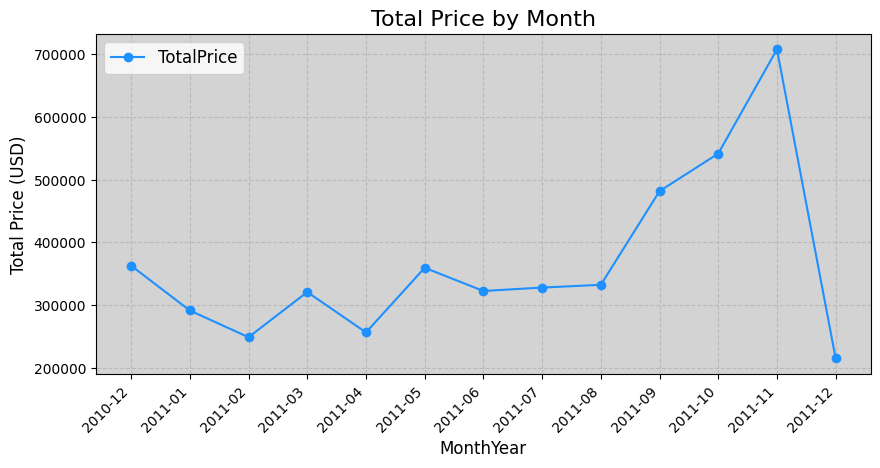

In [153]:
monthly_data = df.groupby('MonthYear')['TotalPrice'].sum().reset_index()

monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

fig, ax = plt.subplots(figsize=(10, 5))
fig.autofmt_xdate()

plt.plot(monthly_data['MonthYear'], monthly_data['TotalPrice'],marker='o', linestyle='-', color='dodgerblue', label='TotalPrice')

plt.title('Total Price by Month', fontsize=16)
plt.xlabel('MonthYear', fontsize=12)
plt.ylabel('Total Price (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

ax.set_facecolor('lightgray')

plt.show() 

**Analyze the Sales Trends over Week**

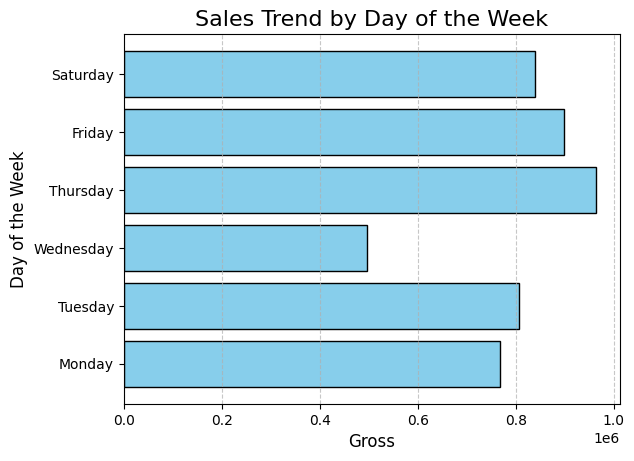

In [154]:
df['DayOfWeek'] = df['Date'].dt.day_name().values

daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()


plt.barh(daily_sales.index, daily_sales.values, color='skyblue', edgecolor='black')

plt.xlabel('Gross', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.title('Sales Trend by Day of the Week', fontsize=16)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.yticks(range(len(days_of_week)), days_of_week, fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)


**The Top-Selling Products and Countries**

In [177]:
items_total_sell = df.groupby('Description Product')['TotalPrice'].sum()

most_valuable_items = items_total_sell.sort_values(ascending=False)
print('The most selling product: \n' ,most_valuable_items.head(10))


The most selling product: 
 Description Product
PARTY BUNTING                         33965.58
WHITE HANGING HEART T-LIGHT HOLDER    33861.33
JUMBO BAG RED RETROSPOT               32054.02
JAM MAKING SET WITH JARS              22998.51
SPOTTY BUNTING                        22693.75
DOORMAT KEEP CALM AND COME IN         20756.41
PAPER CHAIN KIT 50'S CHRISTMAS        20145.56
NATURAL SLATE HEART CHALKBOARD        19957.81
JUMBO BAG VINTAGE DOILY               19737.79
LUNCH BAG RED RETROSPOT               19547.03
Name: TotalPrice, dtype: float64


In [191]:
country_total_sell = df.groupby('Country')['TotalPrice'].sum()

most_valuable_country = country_total_sell.sort_values(ascending=False)
top10_country = most_valuable_country.head(10)
print(top10_country)


Country
United Kingdom    4204789.404
Germany            123967.780
France             107504.790
EIRE               103310.500
Spain               26959.770
Switzerland         26830.010
Belgium             26672.250
Portugal            19076.440
Norway              15313.200
Netherlands         12637.920
Name: TotalPrice, dtype: float64


In [203]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

print(world.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

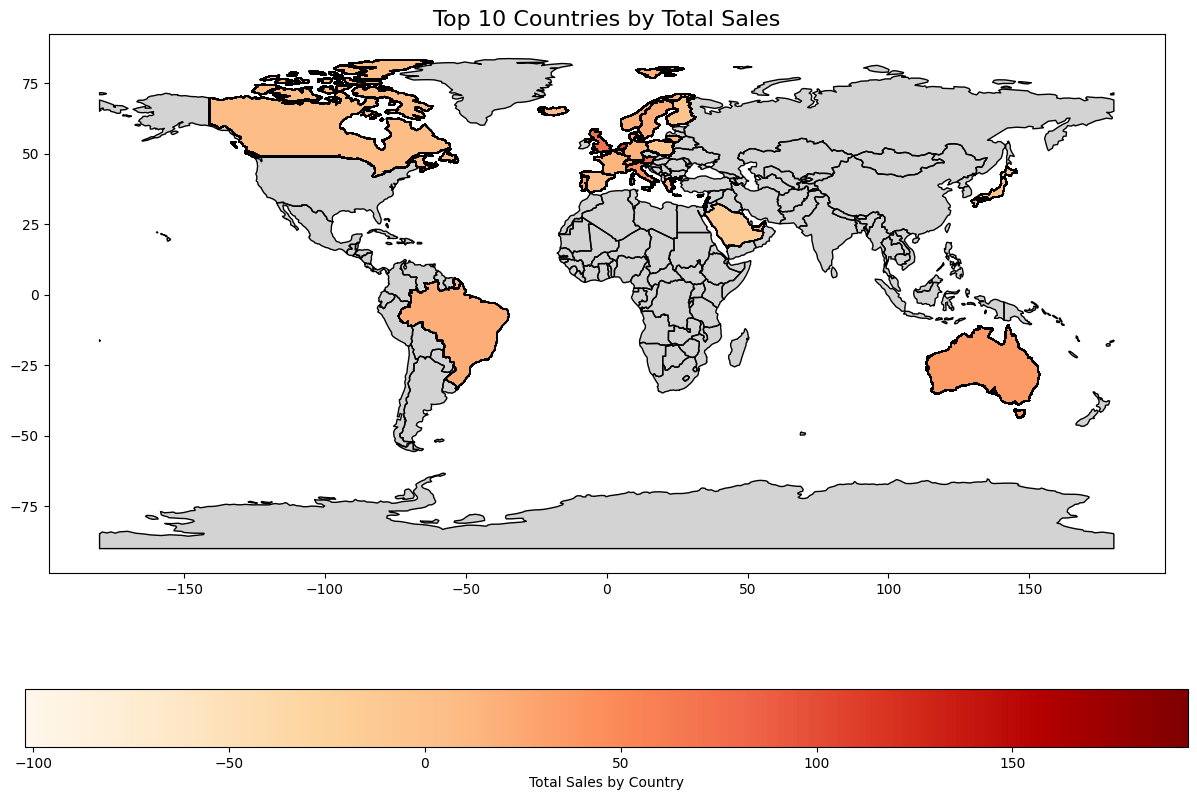

In [205]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

world = world.merge(df, how="left", left_on="ADMIN", right_on="Country")

# Configurar el tamaño del mapa y colores
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color="black")
world.plot(column="TotalPrice", ax=ax, legend=True, 
           legend_kwds={'label': "Total Sales by Country", 'orientation': "horizontal"},
           cmap="OrRd", missing_kwds={"color": "lightgrey", "label": "No Data"})

# Añadir título
plt.title("Top 10 Countries by Total Sales", fontsize=16)
plt.show()

 **Identify any Outliers or Anomalies in the Dataset**

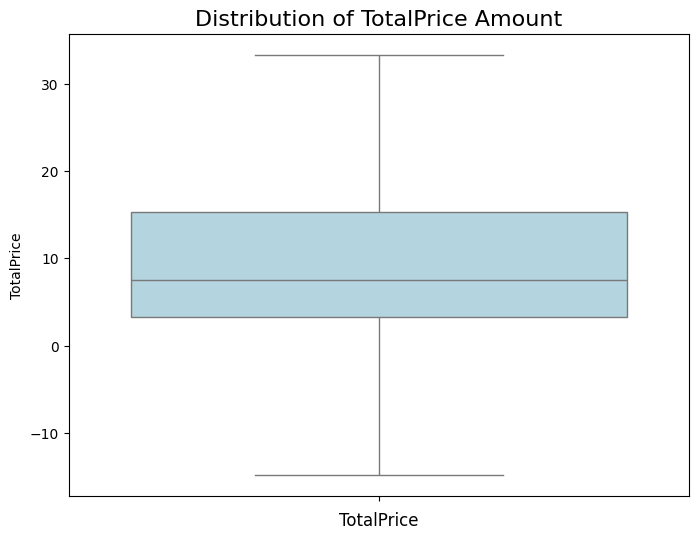

In [206]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y='TotalPrice', color='lightblue', showfliers=False)  

plt.title('Distribution of TotalPrice Amount', fontsize=16)
plt.xlabel('TotalPrice', fontsize=12)

# Show the plot
plt.show()

In [208]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(df['TotalPrice'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = df[outlier_mask]

outliers.shape

(8038, 11)

In [209]:
# Remove outliers from the main dataset
without_outliers_online_retail = df[~outlier_mask]

# Statistical Summary of data without outliers
summary_without_outliers = without_outliers_online_retail.describe()
summary_without_outliers

,Quantity,Date,Price,TotalPrice
count,437754.000000,437754,437754.000000,437754.000000
mean,4.668469,2011-07-04 22:34:24.769665024,2.731578,9.706366
min,-12.000000,2010-12-01 08:26:00,0.000000,-25.200000
25%,1.000000,2011-03-27 15:33:00,1.250000,3.250000
50%,3.000000,2011-07-20 11:55:00,2.080000,7.380000
75%,6.000000,2011-10-19 16:59:00,3.750000,15.000000
max,23.000000,2011-12-09 12:50:00,8.620000,46.750000
std,4.486966,NaN,2.005572,8.788528


In [210]:
df.describe() # Statistical Summary of data with outliers

,Quantity,Date,Price,TotalPrice
count,445792.000000,445792,445792.000000,445792.000000
mean,4.798251,2011-07-04 20:34:22.011969792,2.787131,10.700485
min,-12.000000,2010-12-01 08:26:00,0.000000,-102.000000
25%,1.000000,2011-03-27 14:28:00,1.250000,3.260000
50%,3.000000,2011-07-20 11:38:00,2.100000,7.470000
75%,8.000000,2011-10-19 16:59:00,3.750000,15.300000
max,23.000000,2011-12-09 12:50:00,8.620000,194.810000
std,4.611238,NaN,2.042970,12.053345


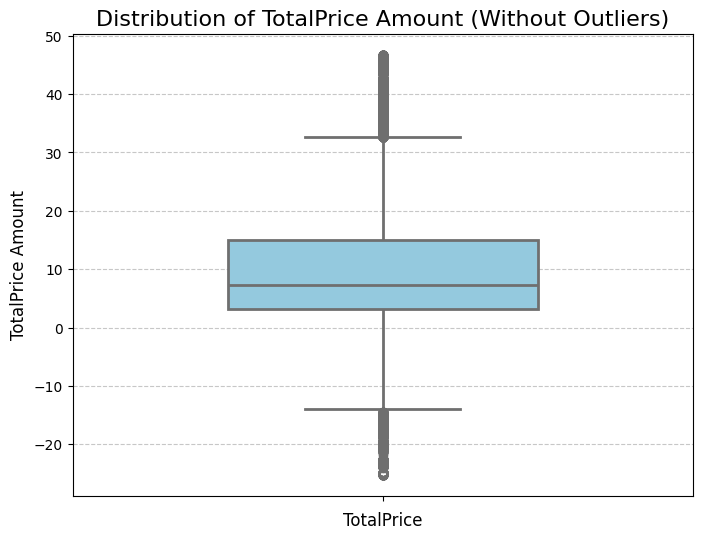

In [217]:
# Create a figure and set its size
plt.figure(figsize=(8, 6))


# Create a box plot for the 'Gross' column without outliers
sns.boxplot(data=without_outliers_online_retail, y='TotalPrice',color='skyblue', width=0.5, linewidth=2)

# Add a title and labels
plt.title('Distribution of TotalPrice Amount (Without Outliers)', fontsize=16)
plt.xlabel('TotalPrice', fontsize=12)
plt.ylabel('TotalPrice Amount', fontsize=12)

# Add a grid to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()